In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
# Use the 10% of dataset
data_path = './data/'
train_data = pd.read_csv(data_path + 'kddcup.data_10_percent')
#train_data = pd.read_csv(data_path + 'kddcup.data')
train_data = train_data.to_numpy()
print("train_data shape :" , train_data.shape)

train_data shape : (494020, 42)


In [3]:
# count the amount of normal(benign) traffic
count = 0
for i in range(0, train_data.shape[0], 1):
    if train_data[i, 41] == "normal.":
        count = count + 1
print('amount of normal data :', count)

amount of normal data : 97277


In [4]:
# pick the normal (benign) traffic
train_data_normal = train_data[0:count, :].copy()
index = 0
for i in range(0, train_data.shape[0], 1):
    if train_data[i, 41] == "normal.":
        train_data_normal[index, :] = train_data[i, :].copy()
        index = index + 1
print("train_data shape (normal only) :", train_data_normal.shape)

train_data shape (normal only) : (97277, 42)


In [5]:
# pick the continuous features
train_data_normal_reshaped = np.delete(train_data_normal, [1, 2, 3, 4, 5, 6, 11, 20, 21, 41], axis = 1)
print("Reshaped : ", train_data_normal_reshaped.shape)

# Room to improve and fix...
# Cannot understand which 32 features should I select
# In the paper "the TAMs of the different types of traffic records are generated using 32 continuous features.""
# Refer this "https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data?select=kddcup.names", 

Reshaped :  (97277, 32)


In [6]:
sum_count = np.sum(train_data_normal_reshaped, axis = 0)
print(sum_count.shape)
print(sum_count)

(32,)
[21075991 0 3 4330 18 2776 23 17 5456 459 43 487 0 794086 1063825
 154.30000000000027 174.50000000000057 5441.829999999997 5470.589999999993
 95866.6299999996 1774.2999999999902 13022.720000000416 14446954 19656382
 82198.07999999374 5494.190000001157 13030.470000004321 2346.629999999916
 206.36999999999867 103.91000000000433 5614.590000000143 5431.000000000112]


(-0.5, 1031.5, 109.5, -0.5)

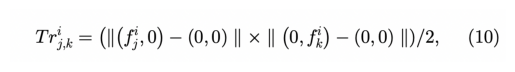

In [7]:
# Triangle-MCA
img1 = cv2.imread('./fig/fig1.png')
plt.imshow(img1)
plt.axis('off')

In [8]:
# Triangle-MCA
area_length = train_data_normal_reshaped.shape[1]
#amount = int(count/10)
amount = count
print("amount of samples :", amount)

area = np.zeros((amount, area_length, area_length),  "float32")
print("Triangle-area shape:", area.shape)
for i in range(0, amount, 1):
    for j in range(0, area_length, 1):
        for k in range(0, area_length, 1):
            if j == k:
                area[i, j, k] = 0. 
            else:
                area[i, j, k] = float(train_data_normal_reshaped[i, j]) * float(train_data_normal_reshaped[i, k]) / 2
# Checked that this works fine

amount of samples : 97277
Triangle-area shape: (97277, 32, 32)


In [9]:
# Cartesian coordinate
cov_length = int(1/2 * (1 + (area_length - 1)) * (area_length - 1))
coordinate = np.zeros((cov_length, 2), "int32")
print("coordinate :", coordinate.shape)
index = 0
for j in range(1, area_length, 1):
    for k in range(j, area_length, 1):
        coordinate[index] = np.array([k, j-1])
        index = index + 1

        # Checked that this works fine

coordinate : (496, 2)


(-0.5, 1043.5, 179.5, -0.5)

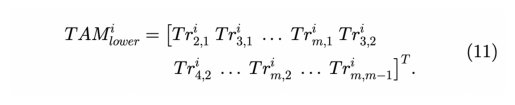

In [10]:
# TAM lower
img2 = cv2.imread('./fig/fig2.png')
plt.imshow(img2)
plt.axis('off')

In [11]:
# TAM lower
# if j = k, it will be 0. Other place will be the area of triangle.
tam = np.zeros((amount, cov_length),  "float32")
print("TAM shape:", tam.shape)
for i in range(0, amount, 1):
    for j in range(0, cov_length, 1):
        tam[i, j] = area[i, coordinate[j, 0], coordinate[j, 1]]

TAM shape: (97277, 496)


In [12]:
'''
sum_tam = np.sum(tam, axis=0)/amount
print(sum_tam.shape)
np.set_printoptions(threshold=1000)
print(sum_tam)
for i in range(0, cov_length, 1):
    if sum_tam[i] <= 0.00000000000001:
        print("hi")
'''

'\nsum_tam = np.sum(tam, axis=0)/amount\nprint(sum_tam.shape)\nnp.set_printoptions(threshold=1000)\nprint(sum_tam)\nfor i in range(0, cov_length, 1):\n    if sum_tam[i] <= 0.00000000000001:\n        print("hi")\n'

In [13]:
ave_tam = np.average(tam, axis = 0)
print(ave_tam)

[0.00000000e+00 3.69923003e-02 2.51042891e+00 1.63096100e-01
 1.88769989e+02 4.01621133e-01 7.84902930e-01 2.06427704e+02
 1.29894218e+01 0.00000000e+00 1.79450953e+00 0.00000000e+00
 1.79731613e+02 1.36463806e+02 2.55193934e-03 6.80222467e-04
 1.69799113e+00 1.76496720e+00 9.81383743e+01 1.01820774e+01
 2.07974151e-01 2.64727109e+04 4.25245239e+02 2.48395991e+00
 7.72688217e+01 9.94121628e+01 1.17713913e-01 5.05658925e-01
 5.01294434e-01 5.17087162e-01 1.29711258e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.08397684e-05 3.23817541e-04
 0.00000000e+00 0.000000

In [14]:
array = np.array([[2, 4],[5, 7],[7, 9]])
print(array.shape)
print(array)
print(np.average(array, axis = 0))

(3, 2)
[[2 4]
 [5 7]
 [7 9]]
[4.66666667 6.66666667]


(-0.5, 1067.5, 1051.5, -0.5)

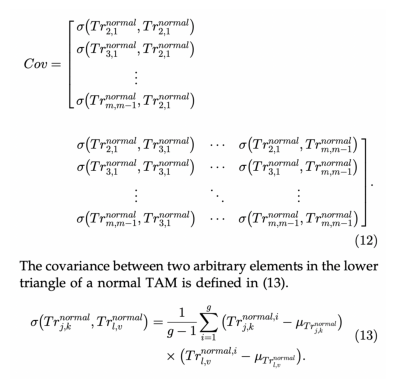

In [15]:
# Covarianceof TAM using lower TAM.
img3 = cv2.imread('./fig/fig3.png')
plt.imshow(img3)
plt.axis('off')

In [16]:
# Calc Covarianceof TAM using lower TAM.
ave_tam = np.average(tam, axis = 0)
print('average of TAM :', ave_tam.shape)
sum_tam = np.zeros((cov_length, cov_length), "float32") 

for i in range(0, amount, 1):
    for j in range(0, cov_length, 1):
        for k in range(0, cov_length, 1):
            sum_tam[j, k] = sum_tam[j, k] + ((tam[i, j] - ave_tam[j]) * (tam[i, k] - ave_tam[k]))
cov = sum_tam * (1 / (amount - 1))

print('Cov shape :', cov.shape)
plt.imshow(cov)

average of TAM : (496,)


KeyboardInterrupt: 

In [ ]:
# MD
img4 = cv2.imread('./fig/fig4.png')
plt.imshow(img4)
plt.axis('off')

In [ ]:
# Mahalanobis distance (MD) for each elements
# input (32,) → TAM (32, 32) compare with average TAM (32, 32). cannot divid (496, 496)? 
# I was wrong, input will be (496, 496) compare with average TAM (496, 496) and divid (496, 496).

md = np.zeros((amount,))
print("MD shape :", md.shape)
print('TAM shape', tam.shape)
print('Average TAM shape', ave_tam.shape)
print("Cov shape", cov.shape)

cov_inv = np.linalg.inv(cov)

for i in range(0, amount, 1):
    md[i] = (np.dot((tam[i] - ave_tam).T, (tam[i] - ave_tam)) / cov) ** (1/2)

In [ ]:
m = np.linalg.det(cov)
print(m)

In [ ]:
# visualize the TAM
n_data = 12
row = 2
col = 6
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(8,6))

for i, img in enumerate(tam[:n_data]):
    _r = i // col
    _c = i % col
    ax[_r,_c].axes.xaxis.set_visible(False) 
    ax[_r,_c].axes.yaxis.set_visible(False)
    ax[_r,_c].imshow(tam[i], cmap='gray') # 画像を表示